# Diabetes Prediction using Machine Learning

Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### **Objective**
We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

### **Details about the dataset:**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1)

**Number of Observation Units: 768**

**Variable Number: 9**

### **Machine Learning Workflow**
#### Steps
1. Data gathering
2. Data preperation
3. Exploratory Data Analysis
4. Data Preprocessing
5. Data Transformation
6. Model Building
7. Model Evaluation

## **1) Data Preperation and Exploratory Data Analysis**

In [ ]:
!pip install -r requirements.txt

In [207]:
#Installation of required libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.simplefilter(action = "ignore") 

In [208]:
#Reading the dataset
df = pd.read_csv("diabetes.csv")

In [209]:
# The first 5 observation units of the data set were accessed.
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [210]:
# The size of the data set was examined. It consists of 768 observation units and 9 variables.
df.shape

(768, 9)

In [211]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [212]:
# Descriptive statistics of the data set accessed.
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99])

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
10%       0.000000   85.000000      54.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
90%       9.000000  167.000000      88.000000      40.000000  210.000000   
95%      10.000000  181.000000      90.000000      44.000000  293.000000   
99%      13.000000  196.000000     106.000000      51.330000  519.900000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
10%     23.600000                  0.165000   22.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
90%     41.500000                  0.878600   51.000000    1.000000  
95%     44.395000                  1.132850   58.000000    1.000000  
99%     50.759000                  1.698330   67.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [213]:
# The distribution of the Outcome variable was examined.
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [214]:
# The classes of the outcome variable were examined.
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

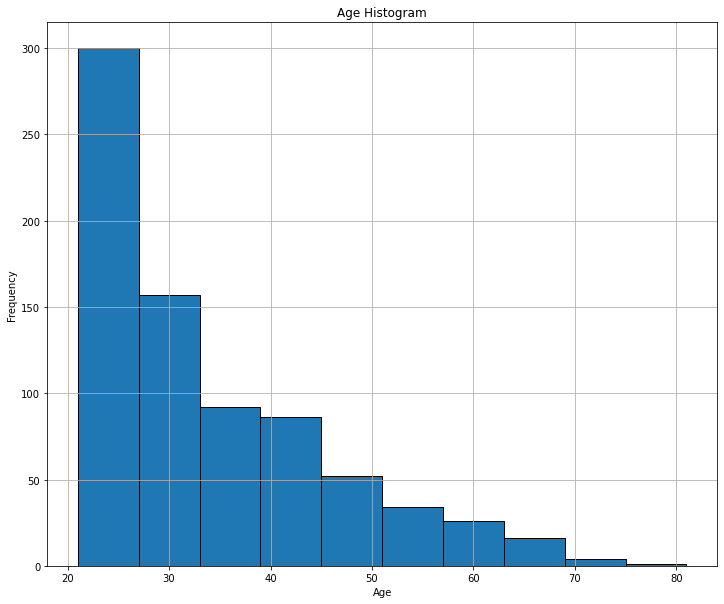

In [215]:
# The histagram of the Age variable was reached.
# If you look at the histogram of the age variable, we can see that the histogram is quite skewed towards left, meaning \n
# data is not distributed properly, so we need to do some preprocessing, such as stadardizing/normalising.
plt.figure(figsize = (12,10))
df["Age"].hist(edgecolor = "black");
plt.xlabel("Age");
plt.ylabel("Frequency");
plt.title("Age Histogram");

In [216]:
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

Max Age: 81 Min Age: 21


<AxesSubplot:xlabel='BMI', ylabel='Density'>

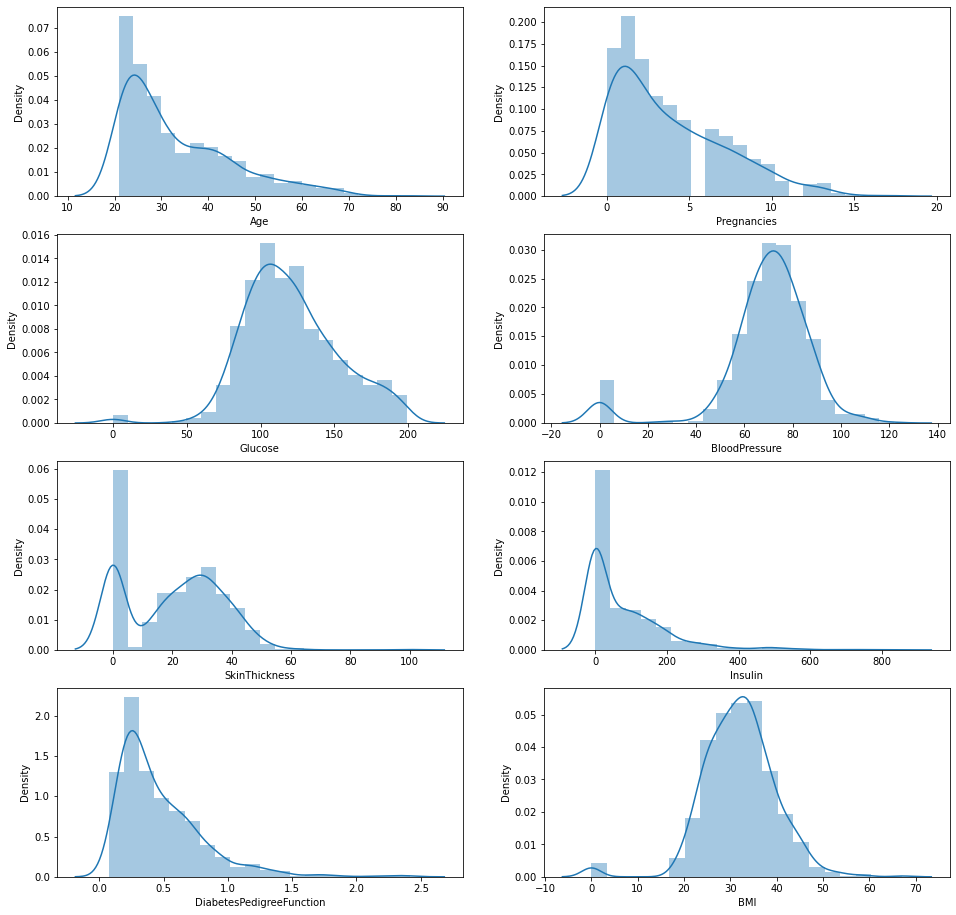

In [217]:
# Histogram and density graphs of all variables were accessed.
# Similar to previous chart, some density plots over here also shows signs of data skewdness, so we need to perform standardization
# before training our model, so that there wont be any bias while predicting the data.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

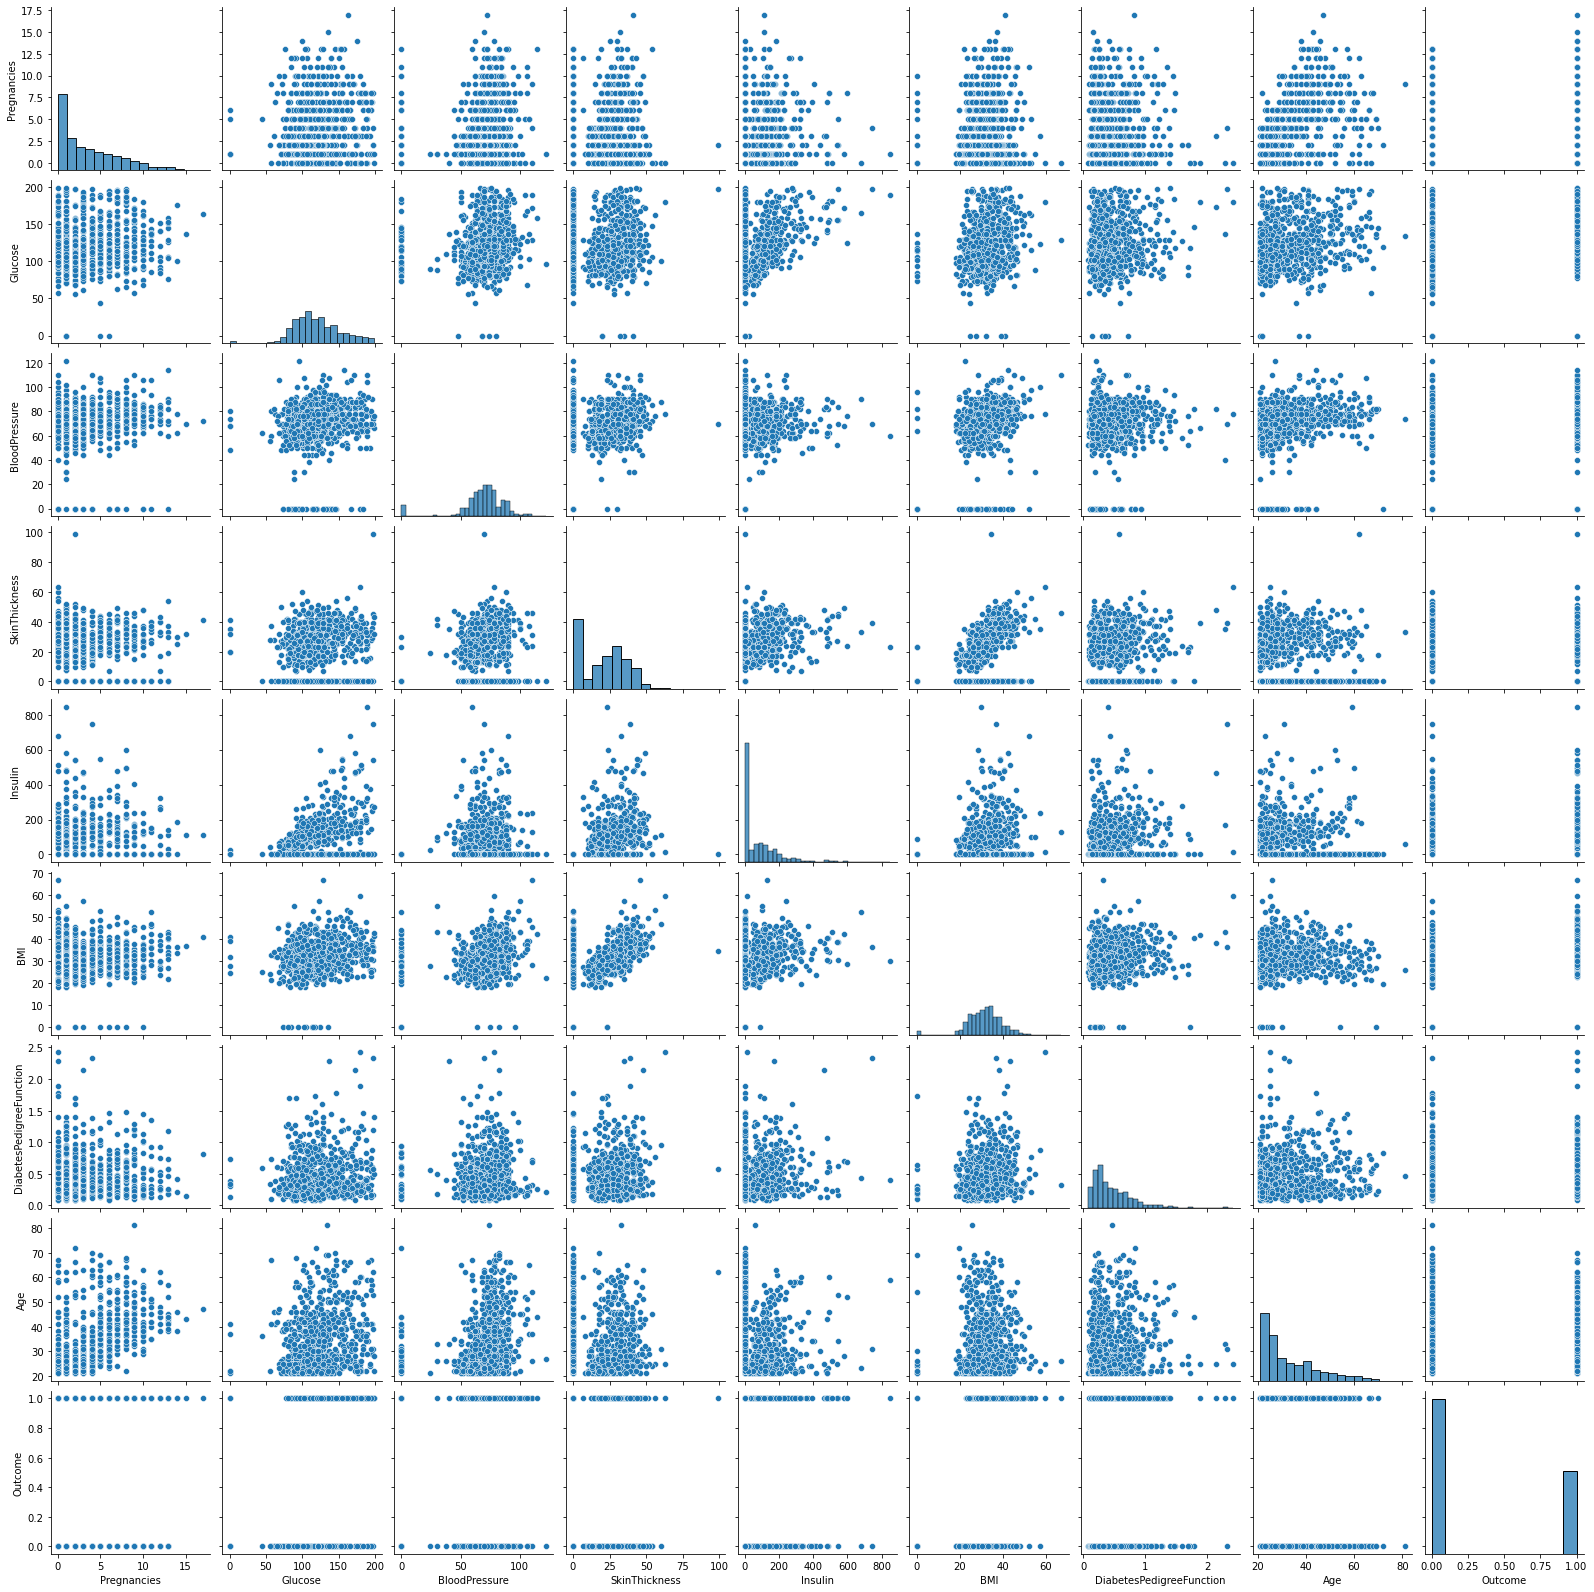

In [218]:
# Plotting a Par Plot to see the relationship between the variables.
sns.pairplot(df)

In [219]:
def group_mean(i):
    ab = df.groupby("Outcome").agg({i:"mean"})
    bc = df.groupby("Outcome").agg({"Insulin": "max"})
    return ab, bc
cd = df.drop(columns=["Outcome"], axis = 1)
for i in cd.columns:
    print(group_mean(i))

(         Pregnancies
Outcome             
0           3.298000
1           4.865672,          Insulin
Outcome         
0            744
1            846)
(            Glucose
Outcome            
0        109.980000
1        141.257463,          Insulin
Outcome         
0            744
1            846)
(         BloodPressure
Outcome               
0            68.184000
1            70.824627,          Insulin
Outcome         
0            744
1            846)
(         SkinThickness
Outcome               
0            19.664000
1            22.164179,          Insulin
Outcome         
0            744
1            846)
(            Insulin
Outcome            
0         68.792000
1        100.335821,          Insulin
Outcome         
0            744
1            846)
(               BMI
Outcome           
0        30.304200
1        35.142537,          Insulin
Outcome         
0            744
1            846)
(         DiabetesPedigreeFunction
Outcome                          
0

In [220]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

Pregnancies
Outcome             
0           3.298000
1           4.865672

In [221]:
df.groupby("Outcome").agg({"Age":"mean"})

Age
Outcome           
0        31.190000
1        37.067164

In [222]:
df.groupby("Outcome").agg({"Age":"max"})

Age
Outcome     
0         81
1         70

In [223]:
df.groupby("Outcome").agg({"Insulin": "mean"})

Insulin
Outcome            
0         68.792000
1        100.335821

In [224]:
df.groupby("Outcome").agg({"Insulin": "max"})

Insulin
Outcome         
0            744
1            846

In [225]:
df.groupby("Outcome").agg({"Glucose": "mean"})

Glucose
Outcome            
0        109.980000
1        141.257463

In [226]:
df.groupby("Outcome").agg({"Glucose": "max"})

Glucose
Outcome         
0            197
1            199

In [227]:
df.groupby("Outcome").agg({"BMI": "mean"})

BMI
Outcome           
0        30.304200
1        35.142537

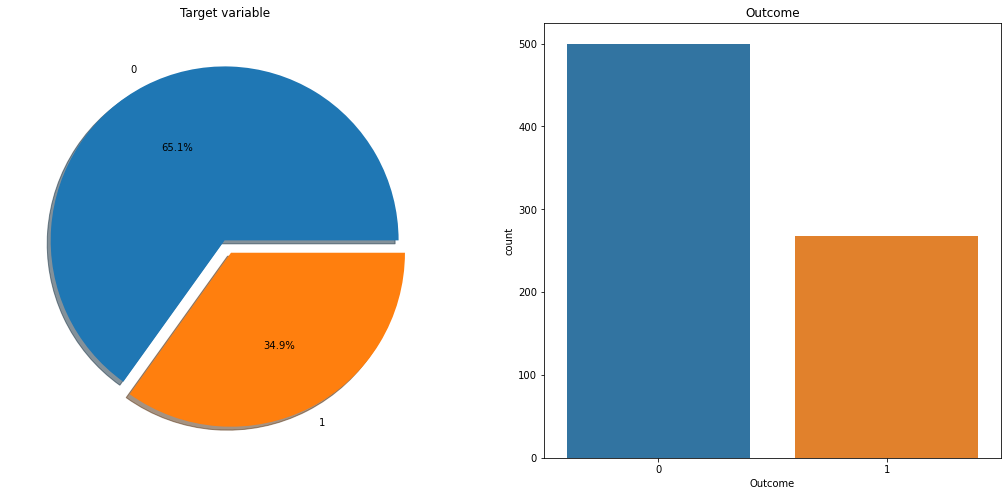

In [228]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.08],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Target variable')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=df,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [229]:
# Below Data Explains about the correlation diagram of the data set.(How well each variable is related to each other.)
# If the correlation value is >0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 
# When the correlations are examined, there are 2 variables that act as a positive correlation to the Outcome dependent variable.
# These variables are Glucose. As these increase, Outcome variable increases.
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

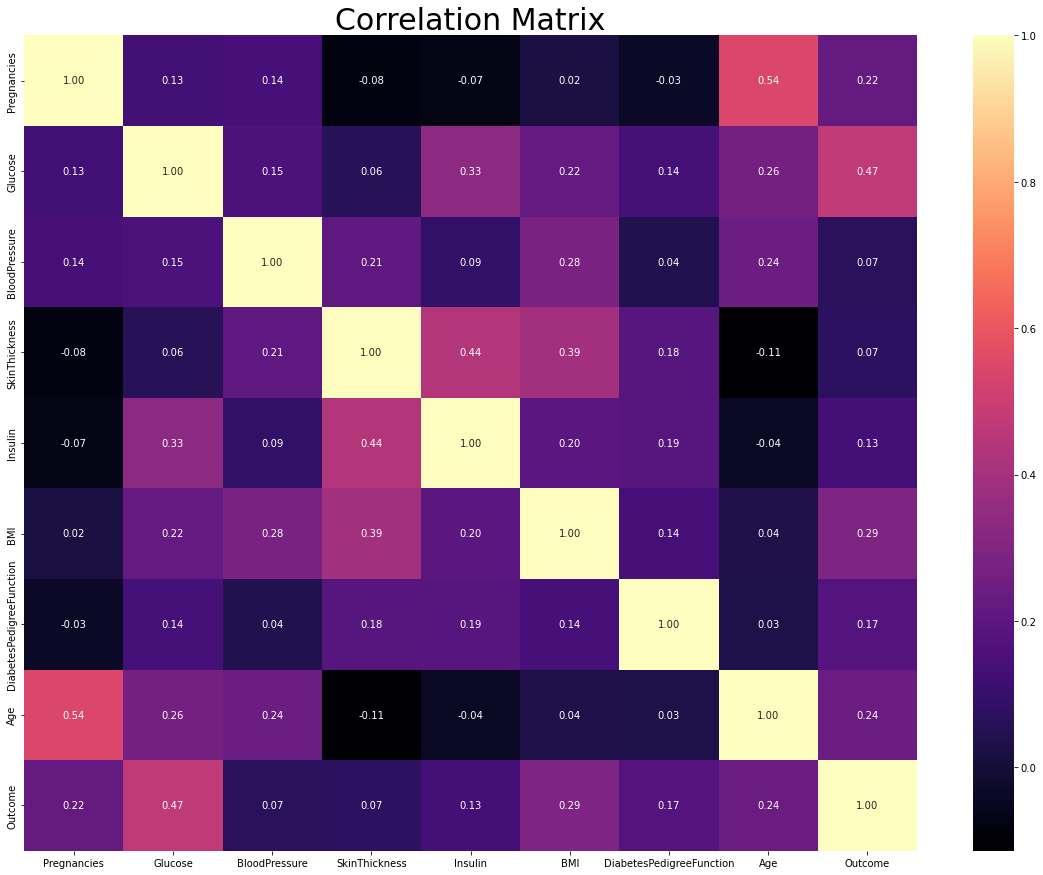

In [230]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=30)
plt.show()

<AxesSubplot:title={'center':'Correlation with target'}>

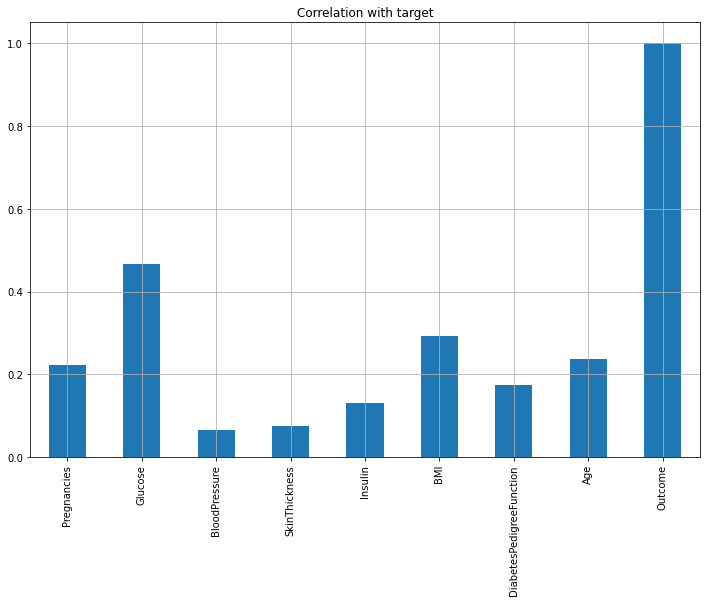

In [231]:
df.corrwith(df.Outcome).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

## **2) Data Preprocessing**

#### 2.1) Eliminating Missing Values

As, We all were aware that, some values weere shown as 0, instead they are null values if we look at them closely, so having null values in or data might lead to a serious problem swhile training our ML Model, since it might give wrong predictions. So Below we replace 0 value by NaN:

In [232]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [233]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [234]:
# Now, we can look at where are missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

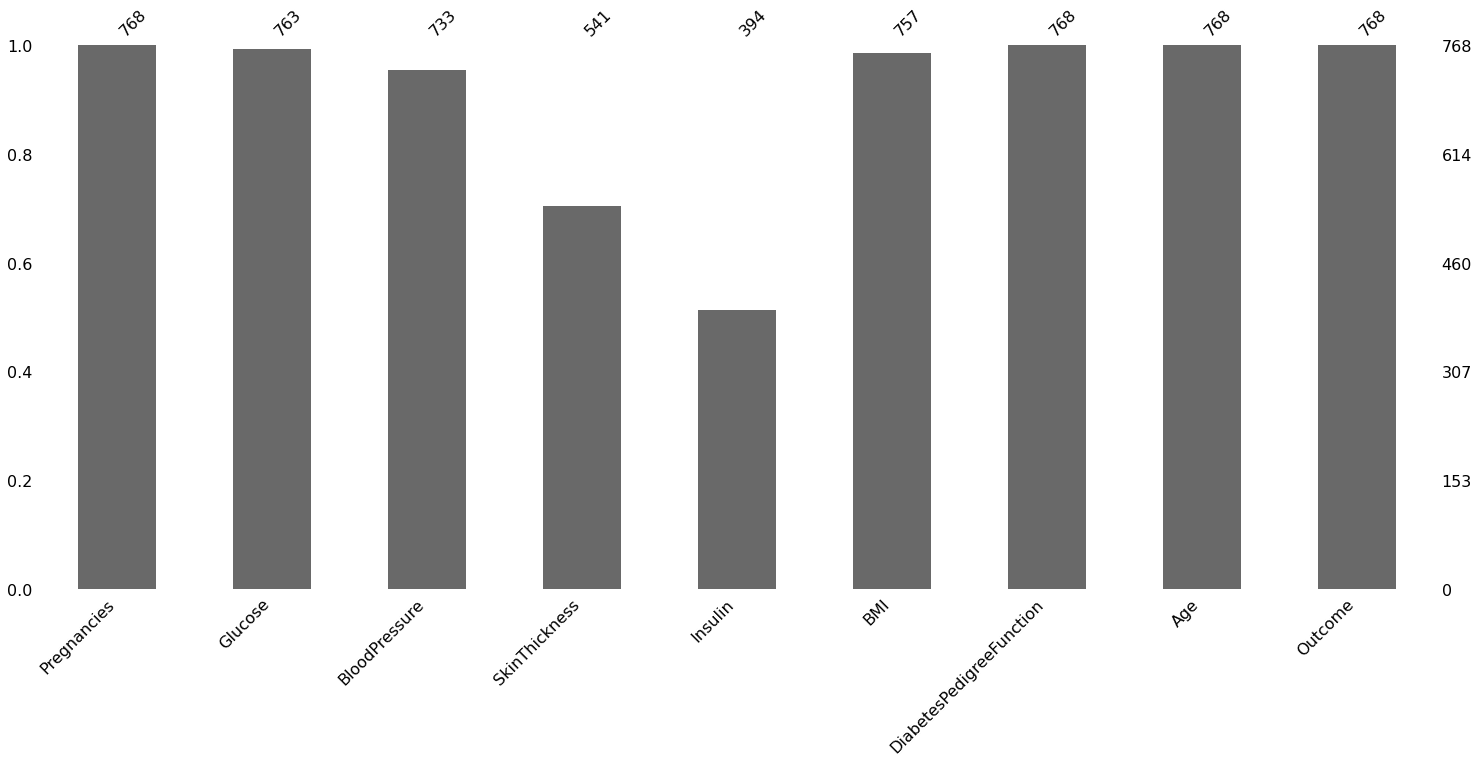

In [235]:
# Have been visualized using the missingno library for the visualization of missing observations.
# Plotting A Bar Plot, so as to visualize count of null values, in each variable.
import missingno as msno
msno.bar(df);

In [236]:
# OK, Now there are alot of techniques on how to fill null values, such as, using Simple Impouter, mean(), median, mode, etc.
# But we are going to analyse each variable, calculate the mean of each variable, with respect to the target variable and then we imputer values, based on the mean for each specific taregt calss.
# The missing values ​​will be filled with the median values ​​of each variable.
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [237]:
df['Insulin'].groupby(df['Outcome']).median()

Outcome
0    102.5
1    169.5
Name: Insulin, dtype: float64

In [238]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    print(median_target(i))

   Outcome  Pregnancies
0        0          2.0
1        1          4.0
   Outcome  Glucose
0        0    107.0
1        1    140.0
   Outcome  BloodPressure
0        0           70.0
1        1           74.5
   Outcome  SkinThickness
0        0           27.0
1        1           32.0
   Outcome  Insulin
0        0    102.5
1        1    169.5
   Outcome   BMI
0        0  30.1
1        1  34.3
   Outcome  DiabetesPedigreeFunction
0        0                     0.336
1        1                     0.449
   Outcome   Age
0        0  27.0
1        1  36.0


In [239]:
df[df['Insulin'].notnull()]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
6              3     78.0           50.0           32.0     88.0  31.0   
8              2    197.0           70.0           45.0    543.0  30.5   
13             1    189.0           60.0           23.0    846.0  30.1   
..           ...      ...            ...            ...      ...   ...   
753            0    181.0           88.0           44.0    510.0  43.3   
755            1    128.0           88.0           39.0    110.0  36.5   
760            2     88.0           58.0           26.0     16.0  28.4   
763           10    101.0           76.0           48.0    180.0  32.9   
765            5    121.0           72.0           23.0    112.0  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
3                       0.167   21        0  
4                       2.288   33        1  
6                       0.248   26        1  
8                       0.158   53        1  
13                      0.398   59        1  
..                        ...  ...      ...  
753                     0.222   26        1  
755                     1.057   37        1  
760                     0.766   22        0  
763                     0.171   63        0  
765                     0.245   30        0  

[394 rows x 9 columns]

In [240]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [241]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [242]:
# Missing values were filled.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### 2.2) Outlier Analysis: 
Outliers are termed as extremely high or low values which are considered to be causwed due to noise/some kind of error.

In [243]:
for i in df:
    print(i)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [244]:
df[df['Pregnancies'] > 10].any(axis = None)

True

In [245]:
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in df:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


Text(0.5, 1.0, 'Outliers using Boxplot in Insulin Variable')

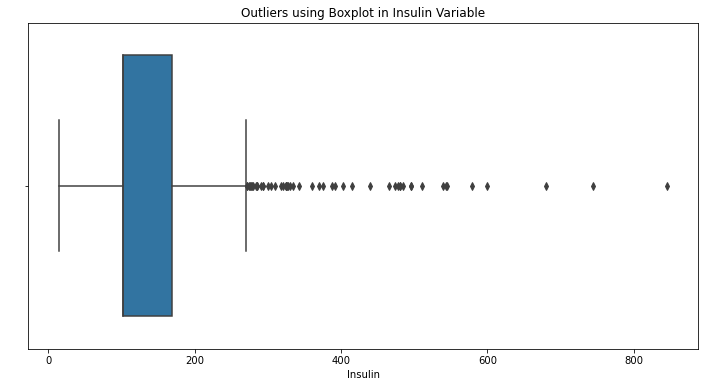

In [246]:
# Visualizing the Insulin Variable in order to find out outliers, using boxplot.
plt.figure(figsize = (12,6))
sns.boxplot(x = df["Insulin"]);
plt.xlabel('Insulin')
plt.ylabel(' ')
plt.title('Outliers using Boxplot in Insulin Variable')

In [247]:
# So inorde to remove these outliers, we supress them by replacing the outlier of that particular column with the Upper bound value, 
# similarly it can done with lower bound value.
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

Text(0.5, 1.0, 'Boxplot After removing outliers.')

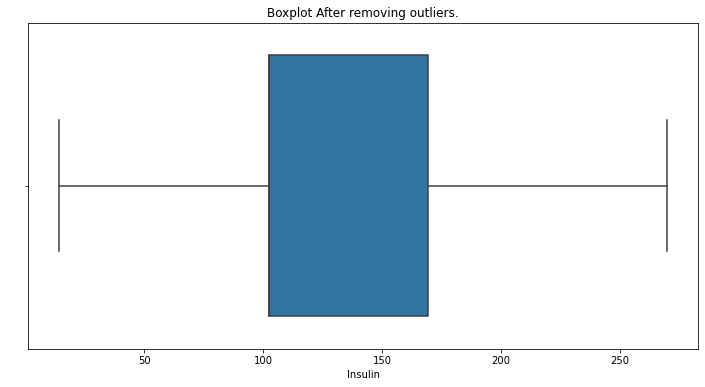

In [248]:
plt.figure(figsize = (12,6))
sns.boxplot(x = df["Insulin"]);
plt.xlabel('Insulin')
plt.ylabel(' ')
plt.title('Boxplot After removing outliers.')

In [249]:
df.shape

(768, 9)

#### 2.3)  Local Outlier Factor (LOF)

In [250]:
# We determine outliers between all variables with the LOF method
# The anomaly score of each sample is called the Local Outlier Factor. It measures the local deviation of the density of a given sample with respect to its neighbors. 
# It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. 
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [251]:

df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.05893469, -2.37289269, -2.15297995, -2.09708735, -2.0772561 ,
       -1.95255968, -1.86384019, -1.74003158, -1.72703492, -1.71674689,
       -1.70343883, -1.6688722 , -1.64296768, -1.64190437, -1.61620872,
       -1.61369917, -1.60057603, -1.5988774 , -1.59608032, -1.57027568,
       -1.55876022, -1.55674614, -1.51852389, -1.50843907, -1.50280943,
       -1.50160698, -1.48391514, -1.4752983 , -1.4713427 , -1.47006248])

In [252]:
#We choose the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

-1.740031580305444

In [253]:
#We delete those that are higher than the threshold
outlier = df_scores > threshold
df = df[outlier]

In [254]:
# The size of the data set was examined.
df.shape

(760, 9)

## **3) Feature Engineering/ Feature Transformation.**

Creating new variables is important for models. But you need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.

In [255]:
# As we know BMI can be categorized into diffferent categories based on their values, such as given below.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [256]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome      NewBMI  
0                     0.627   50        1   Obesity 1  
1                     0.351   31        0  Overweight  
2                     0.672   32        1      Normal  
3                     0.167   21        0  Overweight  
4                     2.288   33        1   Obesity 3

In [257]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [258]:
df['Insulin_Level'] = df.apply(set_insulin, axis = 1)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome      NewBMI Insulin_Level  
0                     0.627   50        1   Obesity 1      Abnormal  
1                     0.351   31        0  Overweight        Normal  
2                     0.672   32        1      Normal      Abnormal  
3                     0.167   21        0  Overweight        Normal  
4                     2.288   33        1   Obesity 3      Abnormal

In [259]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [260]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome      NewBMI Insulin_Level NewGlucose  
0                     0.627   50        1   Obesity 1      Abnormal       High  
1                     0.351   31        0  Overweight        Normal     Normal  
2                     0.672   32        1      Normal      Abnormal       High  
3                     0.167   21        0  Overweight        Normal     Normal  
4                     2.288   33        1   Obesity 3      Abnormal       High

#### 3.1) One Hot Encoding

Categorical variables in the data set should be converted into numerical values, Inorder to make the model understand the data. Inorde to do these we are using pd.get_dummies() to generate dummy variable for each category present in the data variable.

In [261]:
# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values. It is also protected from the Dummy variable trap.
df = pd.get_dummies(df, columns =["NewBMI","Insulin_Level", "NewGlucose"], drop_first = True)

In [262]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  NewBMI_Obesity 1  NewBMI_Obesity 2  \
0                     0.627   50        1                 1                 0   
1                     0.351   31        0                 0                 0   
2                     0.672   32        1                 0                 0   
3                     0.167   21        0                 0                 0   
4                     2.288   33        1                 0                 0   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight  \
0                 0                  0                   0   
1                 0                  1                   0   
2                 0                  0                   0   
3                 0                  1                   0   
4                 1                  0                   0   

   Insulin_Level_Normal  NewGlucose_Low  NewGlucose_Normal  \
0                     0               0                  0   
1                     1               0                  1   
2                     0               0                  0   
3                     1               0                  1   
4                     0               0                  0   

   NewGlucose_Overweight  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

In [263]:
categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'Insulin_Level_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight']]

In [264]:
y = df["Outcome"]
X = df.drop(["Outcome", 'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'Insulin_Level_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight'], axis = 1)
cols = X.columns
index = X.index

In [265]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [266]:
# The variables in the data set are an effective factor in increasing the performance of the models by standardization.  
# There are multiple standardization methods. These are methods such as" Normalize"," MinMax"," Robust" and "Scale".
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [267]:
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.633702  0.872969      -0.032678       0.729917  0.619713  0.193265   
1    -0.851843 -1.205798      -0.544748       0.013203 -0.535753 -0.864848   
2     1.227920  2.027840      -0.715438       0.371560  0.619713 -1.363673   
3    -0.851843 -1.073812      -0.544748      -0.703512 -0.682342 -0.638110   
4    -1.148952  0.510010      -2.763718       0.729917  0.593844  1.629275   

   DiabetesPedigreeFunction       Age  
0                  0.485694  1.445884  
1                 -0.363908 -0.189854  
2                  0.624217 -0.103763  
3                 -0.930310 -1.050769  
4                  5.598702 -0.017671

In [268]:
# Combine the Categorical variables unto the scaled data.
X = pd.concat([X,categorical_df], axis = 1)

In [269]:
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.633702  0.872969      -0.032678       0.729917  0.619713  0.193265   
1    -0.851843 -1.205798      -0.544748       0.013203 -0.535753 -0.864848   
2     1.227920  2.027840      -0.715438       0.371560  0.619713 -1.363673   
3    -0.851843 -1.073812      -0.544748      -0.703512 -0.682342 -0.638110   
4    -1.148952  0.510010      -2.763718       0.729917  0.593844  1.629275   

   DiabetesPedigreeFunction       Age  NewBMI_Obesity 1  NewBMI_Obesity 2  \
0                  0.485694  1.445884                 1                 0   
1                 -0.363908 -0.189854                 0                 0   
2                  0.624217 -0.103763                 0                 0   
3                 -0.930310 -1.050769                 0                 0   
4                  5.598702 -0.017671                 0                 0   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight  \
0                 0                  0                   0   
1                 0                  1                   0   
2                 0                  0                   0   
3                 0                  1                   0   
4                 1                  0                   0   

   Insulin_Level_Normal  NewGlucose_Low  NewGlucose_Normal  \
0                     0               0                  0   
1                     1               0                  1   
2                     0               0                  0   
3                     1               0                  1   
4                     0               0                  0   

   NewGlucose_Overweight  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

In [270]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [271]:
df = pd.concat([X,y], axis = 1)
df.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.633702  0.872969      -0.032678       0.729917  0.619713  0.193265   
1    -0.851843 -1.205798      -0.544748       0.013203 -0.535753 -0.864848   
2     1.227920  2.027840      -0.715438       0.371560  0.619713 -1.363673   
3    -0.851843 -1.073812      -0.544748      -0.703512 -0.682342 -0.638110   
4    -1.148952  0.510010      -2.763718       0.729917  0.593844  1.629275   

   DiabetesPedigreeFunction       Age  NewBMI_Obesity 1  NewBMI_Obesity 2  \
0                  0.485694  1.445884                 1                 0   
1                 -0.363908 -0.189854                 0                 0   
2                  0.624217 -0.103763                 0                 0   
3                 -0.930310 -1.050769                 0                 0   
4                  5.598702 -0.017671                 0                 0   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight  \
0                 0                  0                   0   
1                 0                  1                   0   
2                 0                  0                   0   
3                 0                  1                   0   
4                 1                  0                   0   

   Insulin_Level_Normal  NewGlucose_Low  NewGlucose_Normal  \
0                     0               0                  0   
1                     1               0                  1   
2                     0               0                  0   
3                     1               0                  1   
4                     0               0                  0   

   NewGlucose_Overweight  Outcome  
0                      0        1  
1                      0        0  
2                      0        1  
3                      0        0  
4                      0        1

## **4) Model Building and Model Evaluation**

In [272]:
X = df.drop(columns = ['Outcome'], axis = 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [273]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

#### **1. Logistic Regression**

In [274]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.86%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.889447    0.800000  0.858553    0.844724      0.858258
recall       0.893939    0.792453  0.858553    0.843196      0.858553
f1-score     0.891688    0.796209  0.858553    0.843948      0.858396
support    396.000000  212.000000  0.858553  608.000000    608.000000
_______________________________________________
Confusion Matrix: 
 [[354  42]
 [ 44 168]]

Test Result:
Accuracy Score: 86.84%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision    0.90099   0.803922  0.868421    0.852456      0.868421
recall       0.90099   0.803922  0.868421    0.852456      0.868421
f1-score     0.90099   0.803922  0.868421    0.852456      0.868421
support    101.00000  51.000000  0.868421  152.000000    152.000000
___

#### **2. Decision Tree Classifer**

In [275]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

print_score(dt_clf, X_train, y_train, X_test, y_test, train=True)
print_score(dt_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    396.0  212.0       1.0      608.0         608.0
_______________________________________________
Confusion Matrix: 
 [[396   0]
 [  0 212]]

Test Result:
Accuracy Score: 88.82%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.911765   0.840000  0.888158    0.875882      0.887686
recall       0.920792   0.823529  0.888158    0.872161      0.888158
f1-score     0.916256   0.831683  0.888158    0.873970      0.887880
support    101.000000  51.000000  0.888158  152.000000    152.000000
_______________________________________________
Conf

#### **3. Random Forest Classifier**

In [276]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    396.0  212.0       1.0      608.0         608.0
_______________________________________________
Confusion Matrix: 
 [[396   0]
 [  0 212]]

Test Result:
Accuracy Score: 88.16%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.902913   0.836735  0.881579    0.869824      0.880708
recall       0.920792   0.803922  0.881579    0.862357      0.881579
f1-score     0.911765   0.820000  0.881579    0.865882      0.880975
support    101.000000  51.000000  0.881579  152.000000    152.000000
_______________________________________________
Conf

#### **4. XGB(GRadient Boosting Classifier)**

In [277]:
xgb_clf = GradientBoostingClassifier(random_state = 12345)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.85%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.989924    0.985782  0.988487    0.987853      0.988480
recall       0.992424    0.981132  0.988487    0.986778      0.988487
f1-score     0.991173    0.983452  0.988487    0.987312      0.988480
support    396.000000  212.000000  0.988487  608.000000    608.000000
_______________________________________________
Confusion Matrix: 
 [[393   3]
 [  4 208]]

Test Result:
Accuracy Score: 89.47%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.912621   0.857143  0.894737    0.884882      0.894007
recall       0.930693   0.823529  0.894737    0.877111      0.894737
f1-score     0.921569   0.840000  0.894737    0.880784      0.894200
support    101.000000  51.000000  0.894737  152.000000    152.00000

### **Testing on a Single User.**

In [278]:
new = X_test.iloc[0]
a = np.asarray(new)
a = a.reshape(1,-1)
p = xgb_clf.predict(a)

In [279]:
if (p[0] == 1):
    print("Person has Diabetes and is at risk of dying")
else:
    print("Great! the result is negative and you don't have to worry")

Person has Diabetes and is at risk of dying


# **8) Conclusion**

The aim of this study was to create classification models for the diabetes data set and to predict whether a person is affected by Diabetes or not, with the help of mahcine l;eanring and to obtain the best accuracy for our model which will help us to predict better results. The work flow is as follows:

1) Reading an Understanding the Diabetes Dataset.

2) With Exploratory Data Analysis; The data set's structural data were checked.
The types of variables in the dataset were examined. Size information of the dataset was accessed. The 0 values in the data set are missing values. Primarily these 0 values were replaced with NaN values. Descriptive statistics of the data set were examined.

3) Data Preprocessing section;
df for: The NaN values missing observations were filled with the median values of whether each variable was sick or not. The outliers were determined by LOF and dropped. The X variables were standardized with the rubost method..

4) During Model Building;
At most, 4 algorithms were used and i would say, 4 of them have performed pretty well on out dataset, with better accuracy on both training and testing data.
Algorithms: Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier.

5) Result;
Out of 4, XGB has given us negligeble accuracy score, given as Training - 98.85% and Testing - 89.47%. 
NoteL: Other algorithms also performed very well.